In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('../dataset/data_pos_curacion.csv')

## Mostramos la cantidad de muestras por cada tipo de relacion entre eventos.

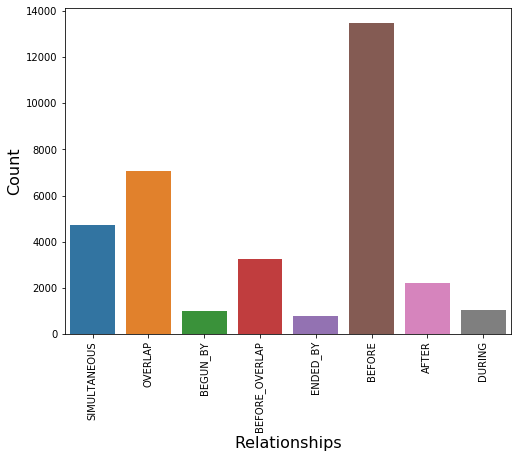

In [3]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="relationship_norm", data=df)
ax.set_xlabel(xlabel='Relationships', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation='vertical')
plt.show();

En el grafico de arriba podemos ver un gran desbalanceo en los datos.

## Mostramos las 20 palabras mas frecuentes.

In [4]:
import spacy
import spacy.attrs
from collections import Counter
spacy_nlp = spacy.load('en_core_web_sm', disable=["tagger", "parser", "ner"])
df['text_norm_as_doc'] = df['text_norm'].apply(lambda x: spacy_nlp(x))
df['text_norm_tokens'] = df['text_norm_as_doc'].apply(lambda doc: [token.text for token in doc if token.is_punct == False])
words = []
for tokens in df['text_norm_tokens']:
  words.extend(tokens)
word_freq = Counter(words)
common_words = [x[0] for x in word_freq.most_common(20)]
common_words_count = [x[1] for x in word_freq.most_common(20)]

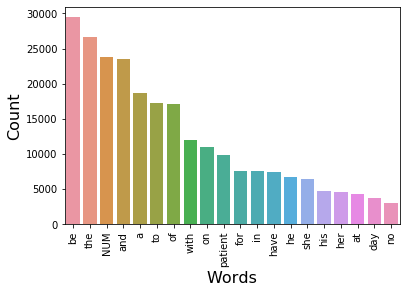

In [5]:
ax = sns.barplot(x=common_words, y=common_words_count)
ax.set_xlabel(xlabel='Words', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation='vertical')
plt.show();

En el gafico de arriba podemos ver que como es esperado las "stop words" son las mas frecuentes. Tambien es de notar que la palabra "NUM" que utilizamos para reemplazar a valores numericos tambien esta dentro de las mas frecuentes.

In [18]:
# Sacamos stopswords y volvemos a visualizar.
df['text_norm_as_doc'] = df['text_norm'].apply(lambda x: spacy_nlp(x))
df['text_norm_tokens'] = df['text_norm_as_doc'].apply(lambda doc: [token.text for token in doc if token.is_stop == False and token.is_punct == False])
words = []
for tokens in df['text_norm_tokens']:
  words.extend(tokens)
word_freq = Counter(words)
common_words = [x[0] for x in word_freq.most_common(20)]
common_words_count = [x[1] for x in word_freq.most_common(20)]

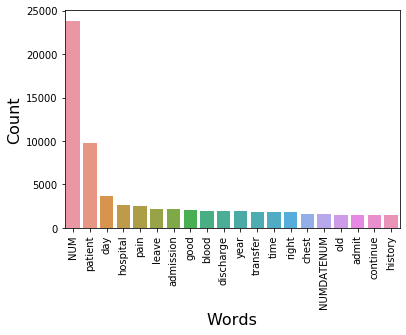

In [7]:
ax = sns.barplot(x=common_words, y=common_words_count)
ax.set_xlabel(xlabel='Words', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation='vertical')
plt.show();

Segun el grafico de arriba es de sperar que NUM y patient esten a lo largo de todas las relaciones.